In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing

In [2]:
#!pip install seaborn
#!pip install xlrd

## Helper functions 

In [2]:
def print_full(x):
  '''
  This is to print nicely DataFrame wide tables
  '''
  pd.set_option('display.max_rows', len(x))
  pd.set_option('display.max_columns', None)
  pd.set_option('display.width', 2000)
  pd.set_option('display.float_format', '{:20,.2f}'.format)
  pd.set_option('display.max_colwidth', -1)
  print(x)
  pd.reset_option('display.max_rows')
  pd.reset_option('display.max_columns')
  pd.reset_option('display.width')
  pd.reset_option('display.float_format')
  pd.reset_option('display.max_colwidth')

### Business objectives
What type of employees are leaving? Determine which employees are prone to leave next.

### Analysis objectives
What features of an emplyee record is predictive of their attrition? What are the best models to predict the attrition of an employee in given time period?

### The data
The data is for company X which is trying to control attrition. There are two sets of data: "Existing employees" and "Employees who have left". Following attributes are available for every employee.
* Satisfaction Level
* Last evaluation
* Number of projects
* Average monthly hours
* Time spent at the company
* Whether they have had a work accident
* Whether they have had a promotion in the last 5 years
* Departments (column sales)
* Salary
* Whether the employee has left


### Focus of this tutorial
In this tutorial we focus mostly in the following areas
* Determine the nature of data - data types, data size, data range
* Determine structural intergrity of data - ensure columns are performing Pandas melt, pivot_table, drop_duplicates, fillna operations
* linearly independed features - during dimensional reduction we want to keep features that are linearly independent and drop those that have high correlation
* feature importance - which features have high predictive power

## Get data to pandas dataframe
*if you have not done so, you should install the xlrd library to be able to read excel sheets*


In [3]:
sheet0 = 'INFO'
sheet1 = 'CurrentEmployees'
sheet2 = 'ChurnedEmployees'

eatt=pd.read_excel('../data/employeeAttrition.xlsx',sheet_name=[1,2])
dfemp = eatt[1]
dfchurn = eatt[2]

In [ ]:
# (orig_df['call_type']
#         .value_counts()
#         .head(n=15))

In [4]:
print('-------------------------------------------')
print('******Current Employers Data Info******: ')
print('-------------------------------------------')
print()
print(dfemp.info())
print('-------------------------------------------')
print('******Churned Employers Data Info********: ')
print('-------------------------------------------')
print()
print(dfchurn.info())

-------------------------------------------
******Current Employers Data Info******: 
-------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11428 entries, 0 to 11427
Data columns (total 10 columns):
Emp ID                   11428 non-null int64
satisfaction_level       11428 non-null float64
last_evaluation          11428 non-null float64
number_project           11428 non-null int64
average_montly_hours     11428 non-null int64
time_spend_company       11428 non-null int64
Work_accident            11428 non-null int64
promotion_last_5years    11428 non-null int64
dept                     11428 non-null object
salary                   11428 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 892.9+ KB
None
-------------------------------------------
******Churned Employers Data Info********: 
-------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3571 entries, 0 to 3570
Data columns (tota

## Combined data with label for easier plotting

In [50]:

df1 = dfemp.copy()
df1.insert(dfemp.shape[1],column='LeftJob',value=False)
#
df2 = dfchurn.copy()
df2.insert(dfchurn.shape[1],column='LeftJob',value=True)

dfall = pd.concat([df1,df2],axis=0)
dfall.shape 

categorical = ['salary','dept','Work_accident']

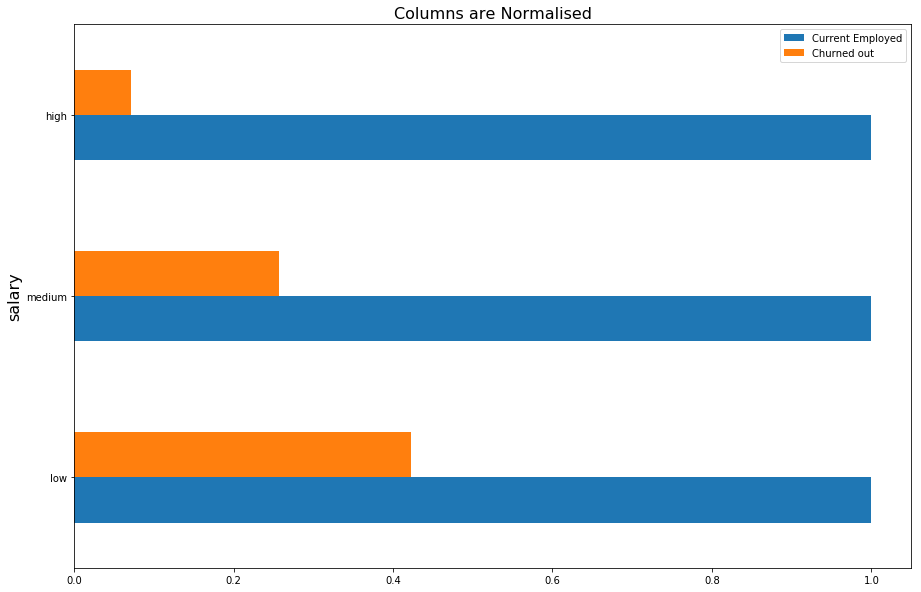

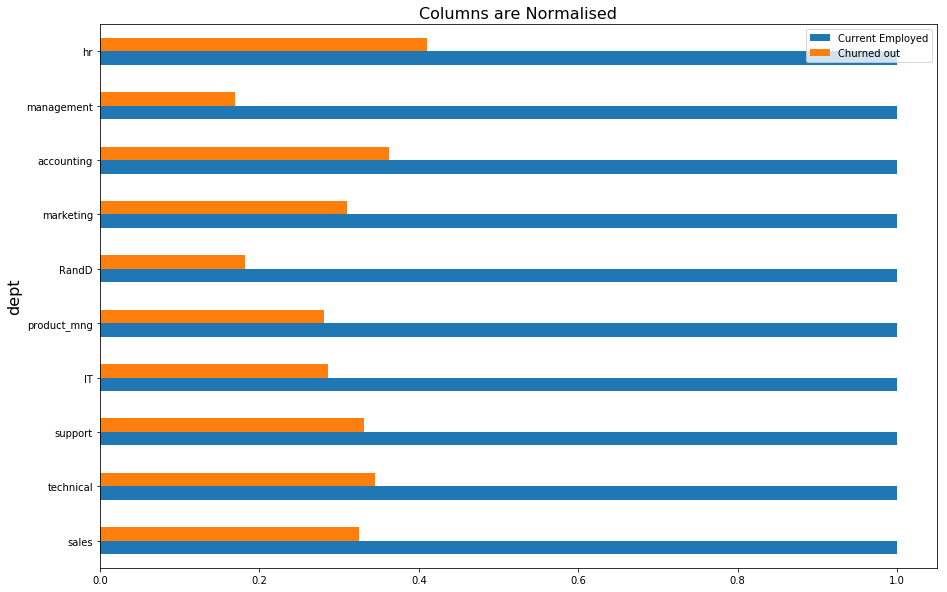

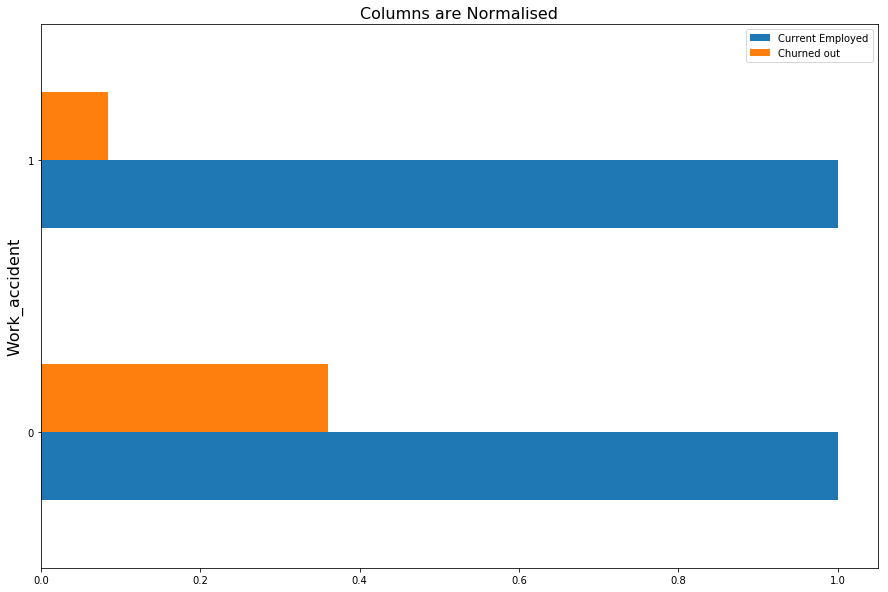

In [100]:
def normalised_df(df):
    #normalise
        
    dfn = df.apply(lambda x: (x)/x.max(),axis=1)
    #min_max_scaler = preprocessing.MinMaxScaler()
    #dfn = min_max_scaler.fit_transform(df)
    
    
    return dfn
   
def standardised_df(df):   
        
    dfs=(df-df.mean(axis=1))/df.std(axis=1)   
    
    return dfs

def hbar_plot(col,std=False,norm=True):
    fig,ax = plt.subplots(1,1,figsize=(15,10))
    
    df1 = dfemp[col].value_counts()
    df2 = dfchurn[col].value_counts()
    df1.name = 'Current Employed'
    df2.name = 'Churned out'
    df = pd.concat([df1.to_frame(),df2.to_frame()],axis=1,sort=False).fillna(0)

    if norm:
        df = normalised_df(df)
        ax.set_title('Columns are Normalised',fontsize=16)
        
    if std:
        df = standardised_df(df)
        ax.set_title('Columns are Standardised',fontsize=16)
    

    df.plot(kind='barh',ax=ax)
    ax.set_ylabel(col,fontsize=16)
    

    
for col in categorical:
    hbar_plot(col, std=False,norm=True)

bar plot for salary column failed


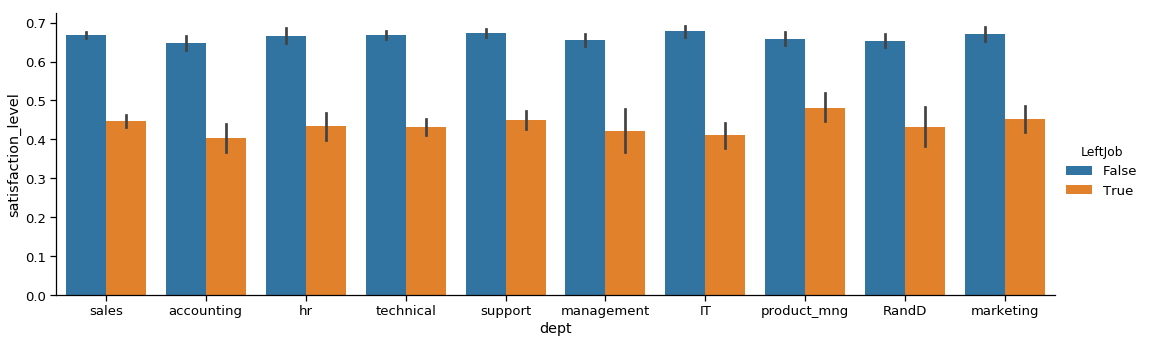

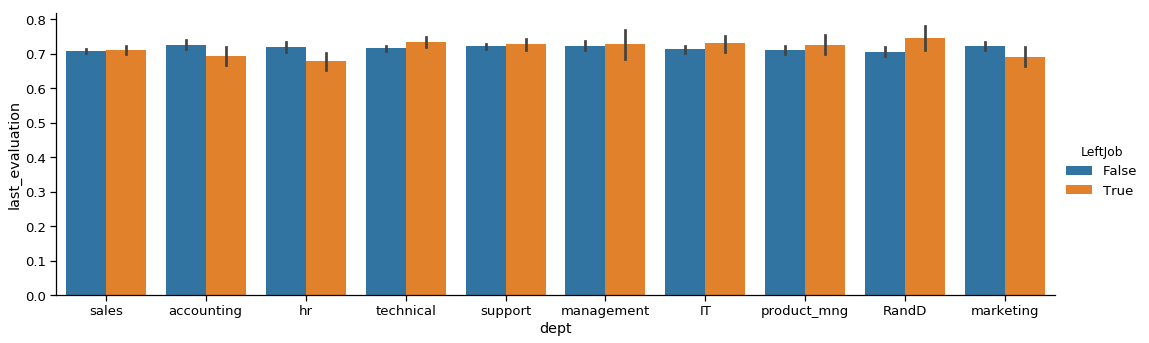

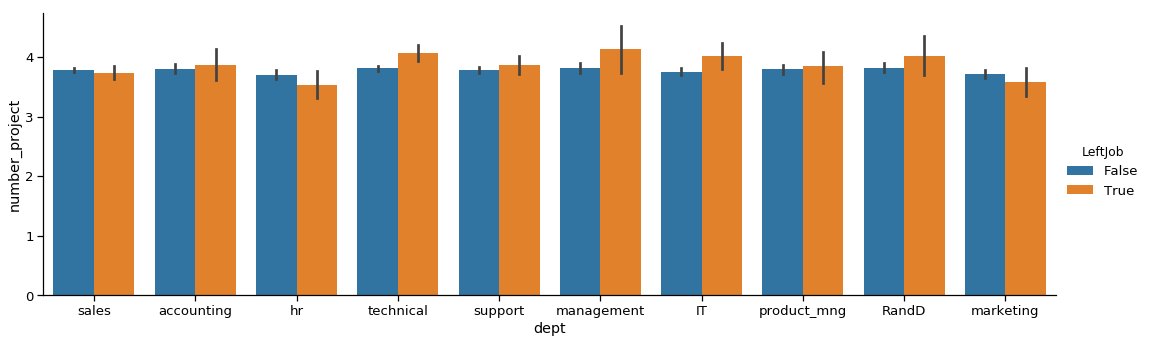

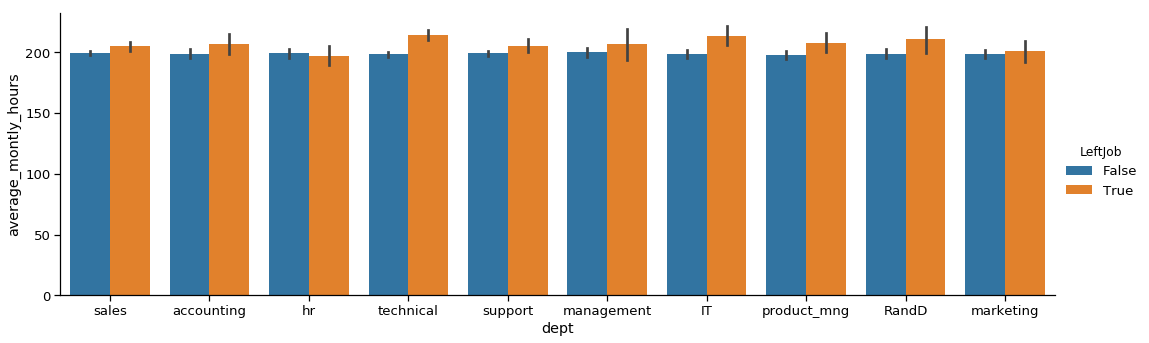

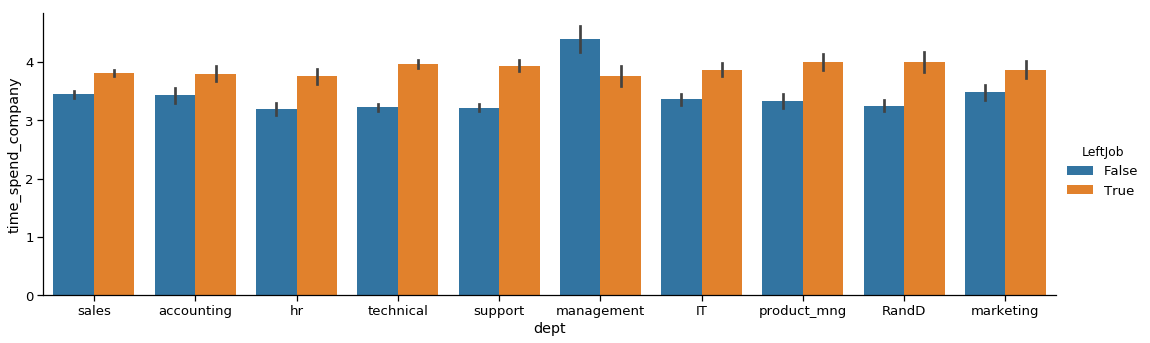

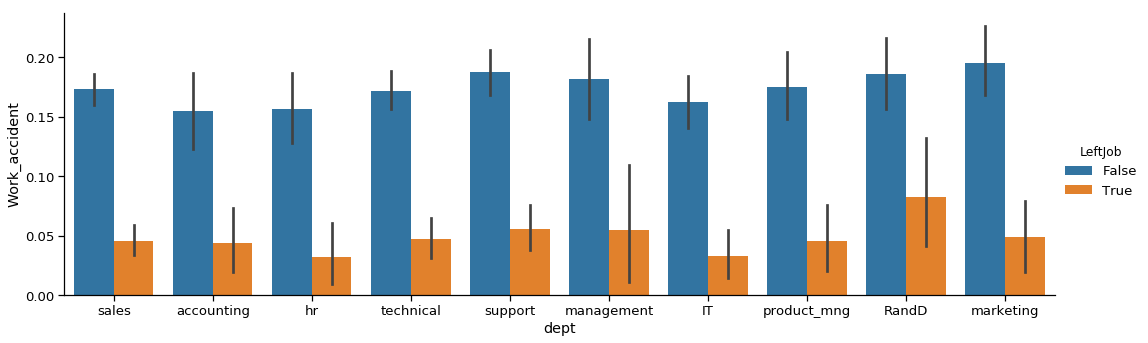

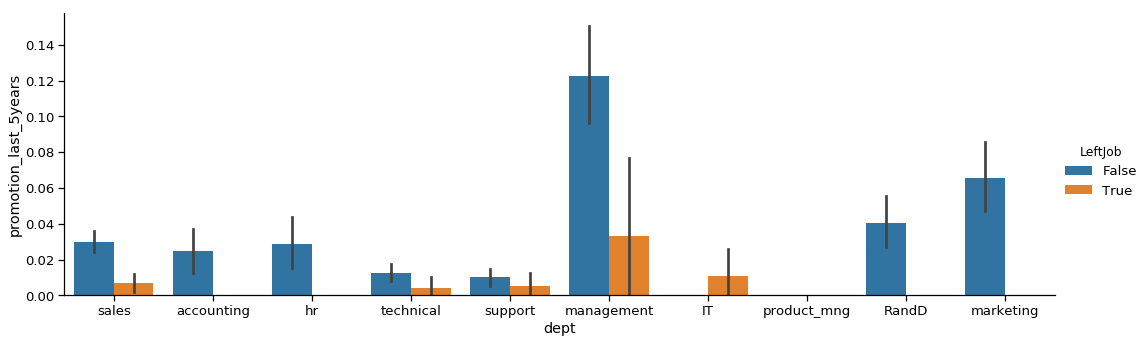

In [46]:

def plot_bar(df, x, hue="LeftJob", kind="bar",fontsize=1.2):
    ylist = list(dfall.columns)
    ylist.remove(x)
    ylist.remove(hue)
    if 'Emp ID' in ylist:
        ylist.remove('Emp ID')

    for y in ylist:
        try:
            with sns.plotting_context("notebook", font_scale=fontsize):            
                sns.catplot(x=x, 
                            y=y, 
                            hue=hue, 
                            kind=kind,
                            height=5,
                            aspect=3,
                            data=dfall)
        except:
            print(f"{kind} plot for {y} column failed")

plot_bar(dfall, x='dept')
#sns.pairplot(dfall,col=["last_evaluation",'Work_accident','satisfaction_level'],
#             row=['time_spend_company','promotion_last_5years'], hue='LeftJob');

bar plot for dept column failed


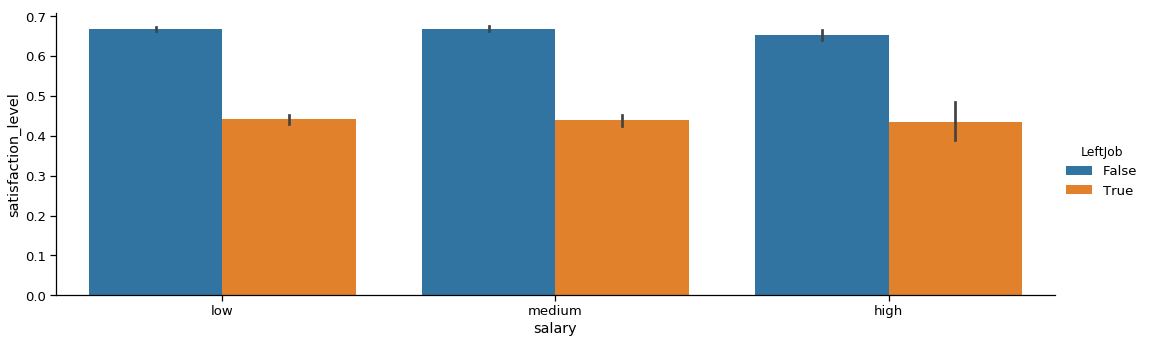

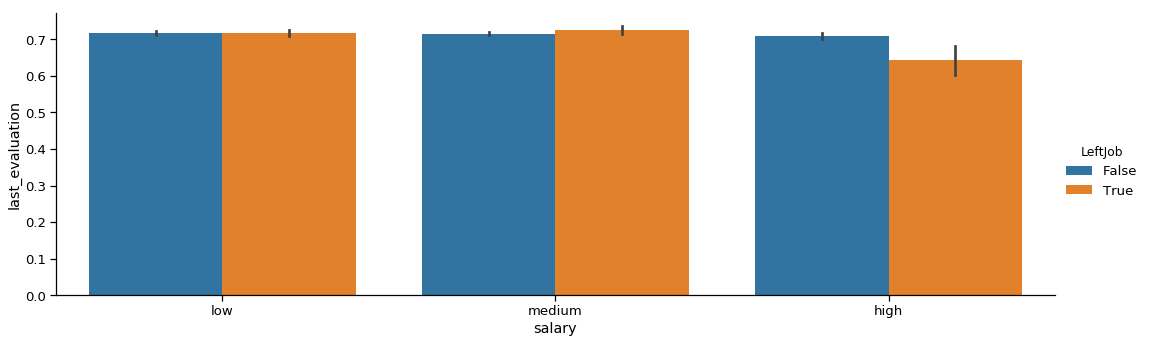

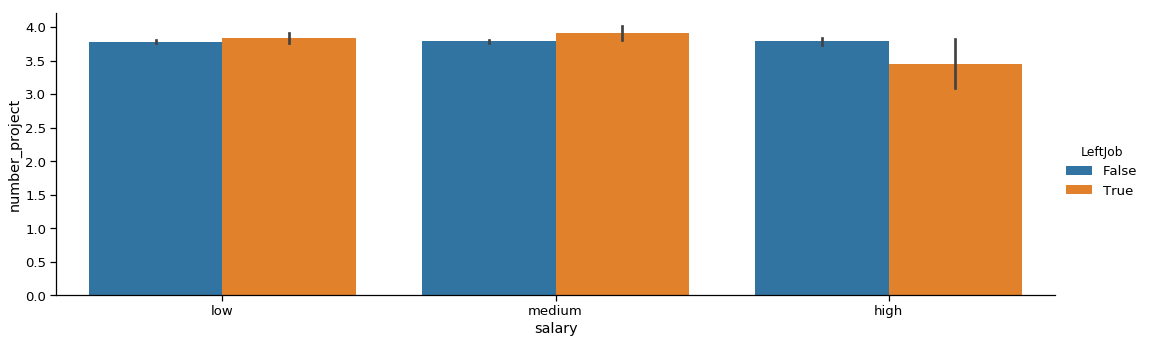

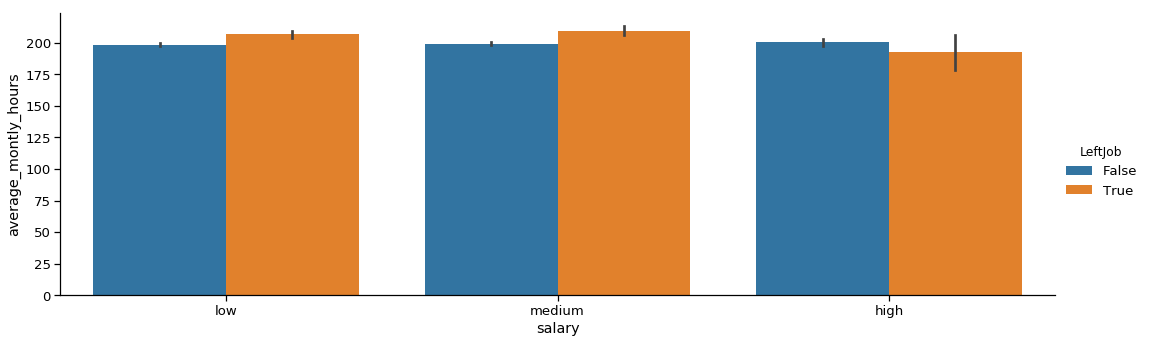

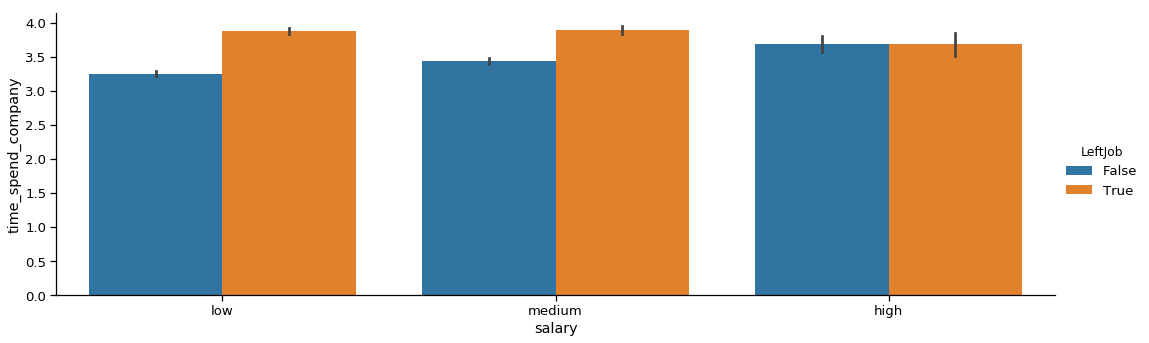

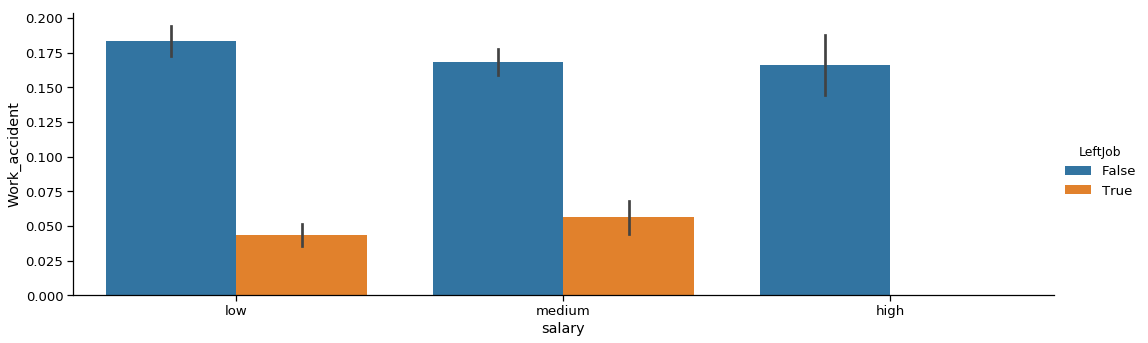

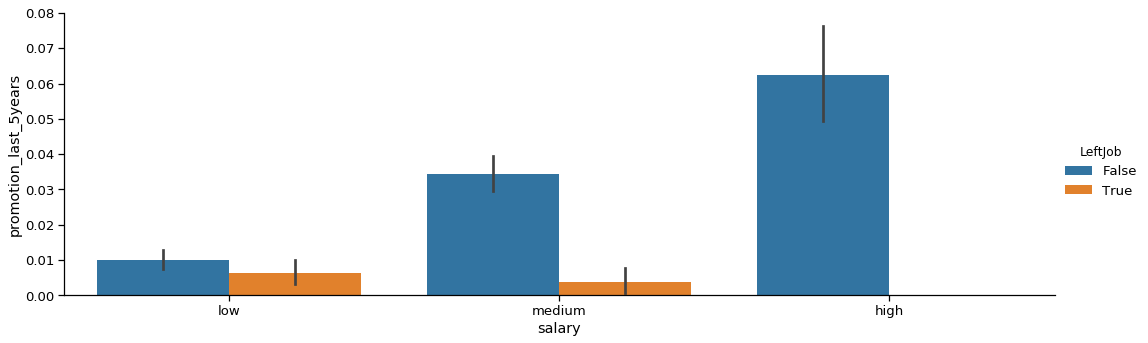

In [48]:
plot_bar(dfall,x='salary')

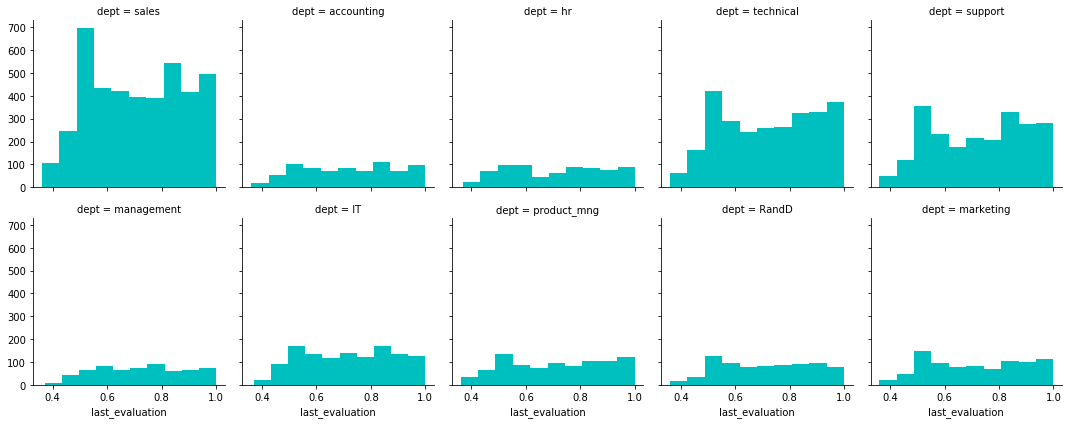

In [35]:
g = sns.FacetGrid(dfall, col="dept",col_wrap=5)
g = (g.map(plt.hist, "last_evaluation", color="c"))

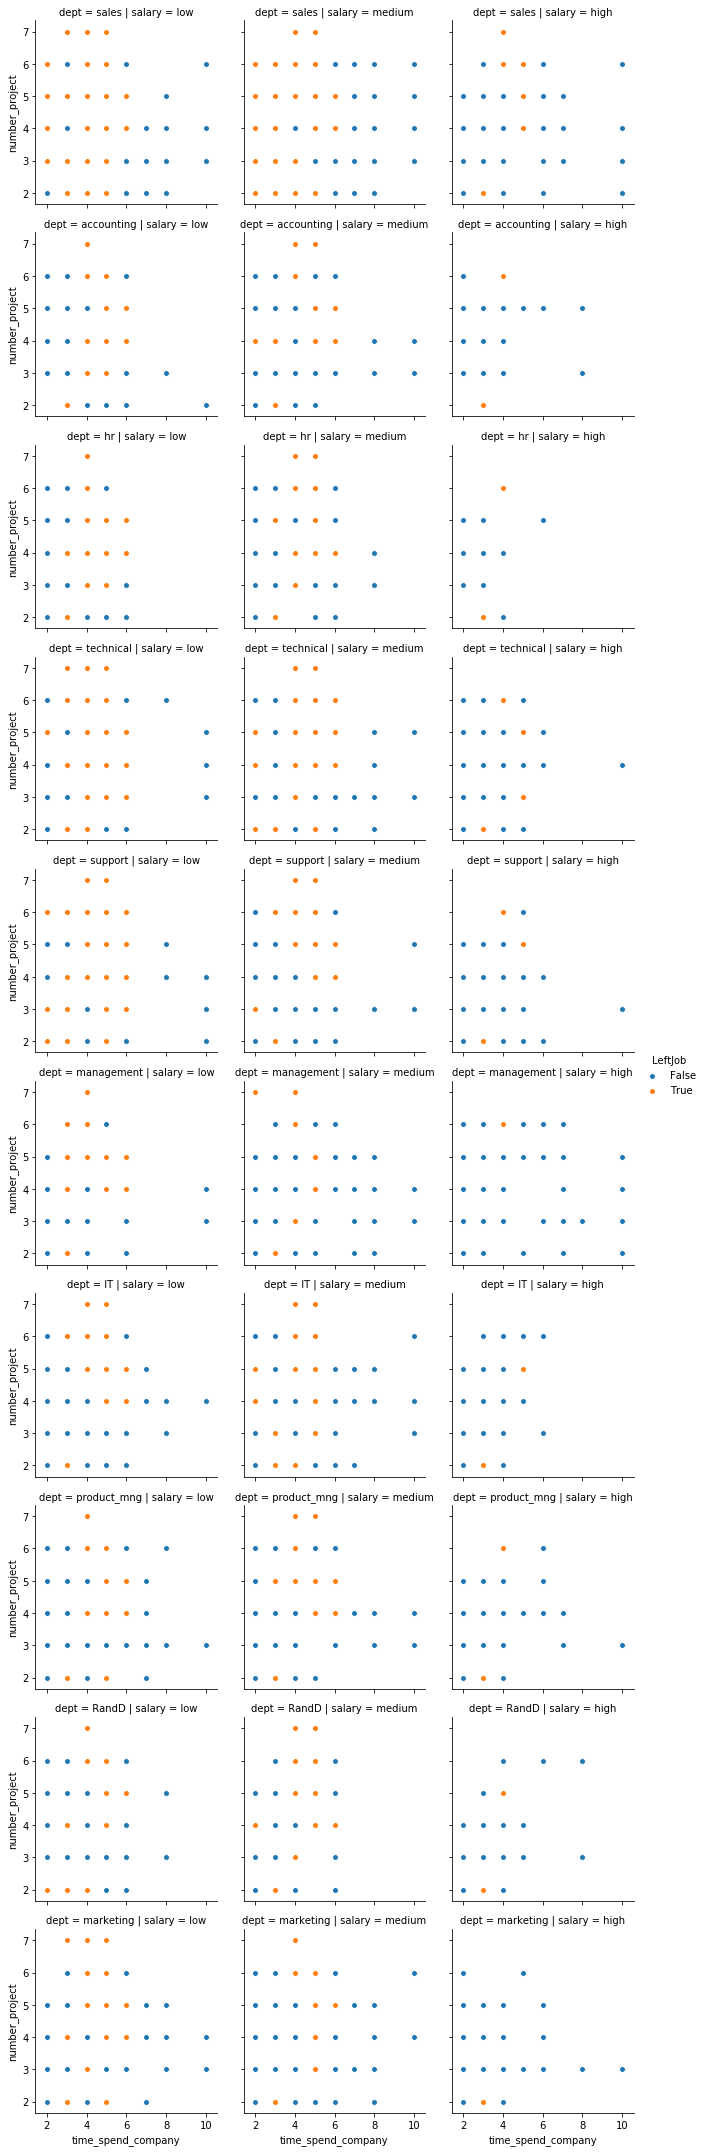

In [30]:
g = sns.FacetGrid(dfall,col='salary',row='dept',hue='LeftJob')
g = g.map(plt.scatter, "time_spend_company", "number_project", 
          edgecolor="w").add_legend()

## Step 1
Remove indexing features and others that carry no information - useful only for data structure

In [25]:
dfchurn1 = dfchurn.drop(columns=['Emp ID'])

## Make heat maps
determine how features are correlated - this helps in the dimension reduction processs 

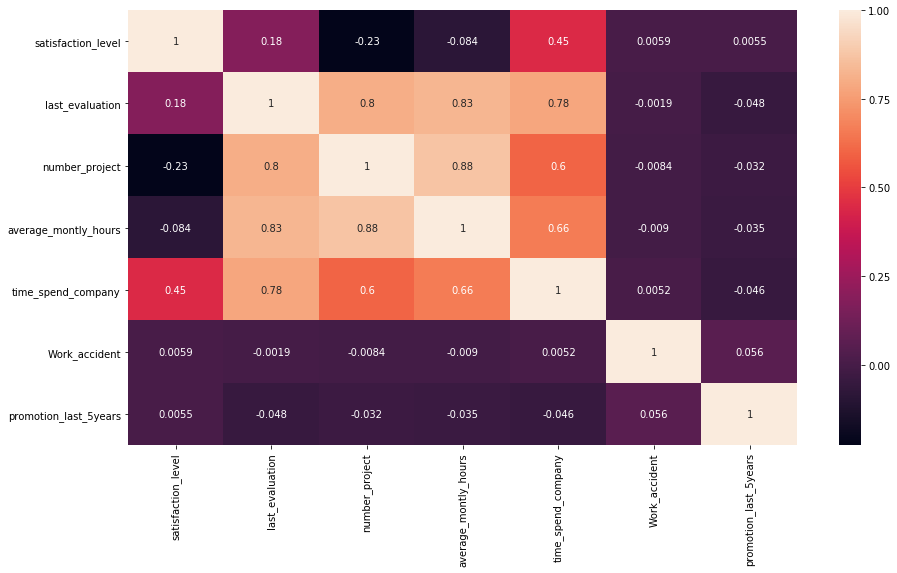

In [26]:
corr = dfchurn1.corr()
f, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [27]:
#freq_table=pd.crosstab(index=logeng['Frequency'],columns=logeng['click'])
dfchurn1.groupby(dfchurn1.dept).satisfaction_level.sum()

plotting the frequeny with two bar charts

## Feature Importance calculation through predictive modelling


In [128]:
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

#
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

#
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import scale, StandardScaler
#
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.metrics import r2_score


from collections import defaultdict


# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier


## get data into training and test spllit for further processing

In [131]:
X = dfall.copy()
Y = X['LeftJob']
X = X.drop(columns=['Emp ID','LeftJob','dept']).fillna(0)

X['salary'] = X['salary'].map(lambda x:{'low':0,'medium':1,'high':2}.get(x,0))

#test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

#validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state=1)

print(X_train.shape)
print(y_train.shape)

(8999, 8)
(8999,)


### Perform 5 CV modelling to obtain a good model.
We use an ROC scorer for the evaluation

In [132]:
#
rocauc_scorer = metrics.make_scorer(metrics.roc_auc_score)

rfc = RandomForestClassifier(n_jobs=-1, max_features=None ,n_estimators=50)
#                              , oob_score = True) 
param_grid = { 
    'n_estimators': [50, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth':[50,150],
    'min_samples_leaf':[1,10]
}

CV_rfc = GridSearchCV(estimator=rfc, 
                      param_grid=param_grid,
                      scoring = rocauc_scorer,
                      cv= 5)

CV_rfc.fit(X_train, y_train)
# CV_rfc.score()

print(CV_rfc.best_params_)

{'max_depth': 150, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 200}


Text(0.5, 0, 'Relative Importance')

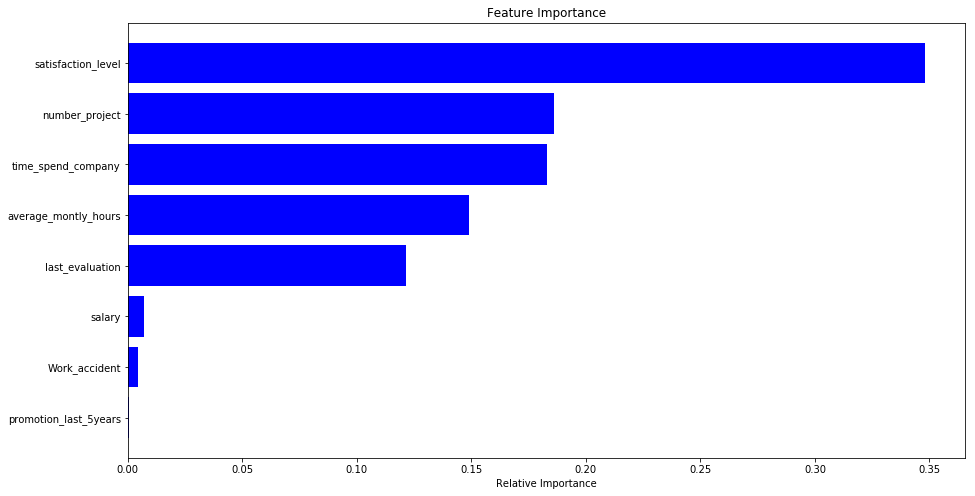

In [138]:
features = X.columns
importances = CV_rfc.best_estimator_.feature_importances_
indices = np.argsort(importances)

f, ax = plt.subplots(figsize=(15, 8))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.savefig('feat_importance',bbox_inches="tight")
#plt.show()